In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data'

In [2]:
X=np.load('X_val.npy')
y=np.load('y_val.npy')

In [3]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data\\model")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data\\model'

In [4]:
def f1score(precision, recall):
    _f1score = ( 2 * recall * precision) / (recall + precision)
    
    # return a single tensor value
    return _f1score

In [5]:
from keras import layers, models
from keras.models import load_model
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def model_load(model):
    model = load_model(model,compile=False)
    model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-5), 
            metrics=['acc',tf.keras.metrics.AUC(),
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall(),f1score])
    
    return model

Using TensorFlow backend.


In [6]:
import glob

file_list = glob.glob('*.*')
print(file_list)

['Inception v3_1.h5', 'Inception v3_fine tuning_1.h5', 'Inception v3_transfer learning_1.h5', 'ResNet50_1.h5', 'ResNet50_fine tuning_1.h5', 'ResNet50_transfer learning_1.h5', 'VGG16_1.h5', 'VGG16_fine tuning_1.h5', 'VGG16_transfer learning_1.h5']


In [7]:
for i in file_list[:3]:
    model=model_load(i)
    _loss, _acc, _auc, _precision, _recall, _f1score = model.evaluate(X, y, batch_size=32)
    print('model name :',i)
    print('loss: {:.3f}, accuracy: {:.3f}, auc: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _auc, _precision, _recall, _f1score))

343/343 [==============================] - 14s 41ms/step
model name : Inception v3_1.h5
loss: 1.543, accuracy: 0.452, auc: 0.781, precision: 0.450, recall: 0.431, f1score: 0.141
343/343 [==============================] - 8s 22ms/step
model name : Inception v3_fine tuning_1.h5
loss: 1.719, accuracy: 0.350, auc: 0.602, precision: 0.354, recall: 0.260, f1score: 0.105
343/343 [==============================] - 8s 22ms/step
model name : Inception v3_transfer learning_1.h5
loss: 2.103, accuracy: 0.580, auc: 0.788, precision: 0.532, recall: 0.524, f1score: 0.154


In [8]:
predict = model.predict_classes(X)
y_val_origin=np.argmax(y,axis=1)
#calc_benign, calc_malignant, mass_benign, mass_malignant

In [9]:
def plot_data(X, y, predict, num_figures): 
    plt.figure(figsize=(30, 20)) 
    
    for i in range(num_figures): 
        plt.subplot(2, num_figures, i+1) 
        plt.imshow(X[i]) 
        
        if y[i] == predict[i]: 
            plt.title(str(predict[i]), fontsize=30) 
        else: 
            plt.title("label :"+ str(y[i]) + ", predict :" + str(predict[i]), fontsize=30) 
    plt.tight_layout() 
    plt.show() 

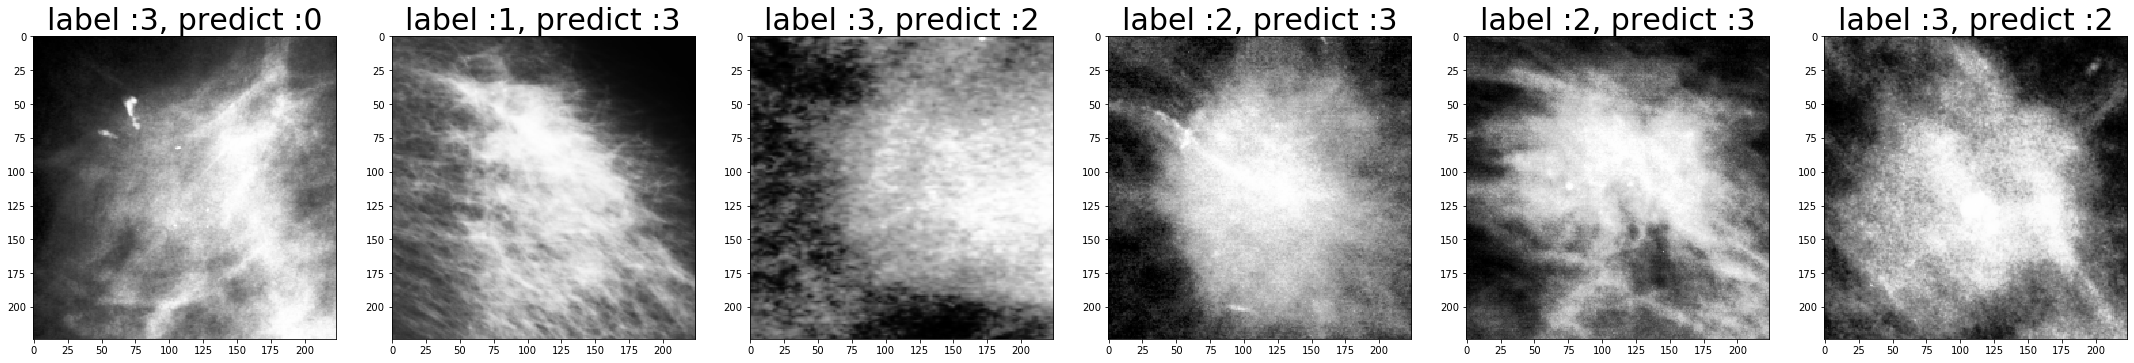

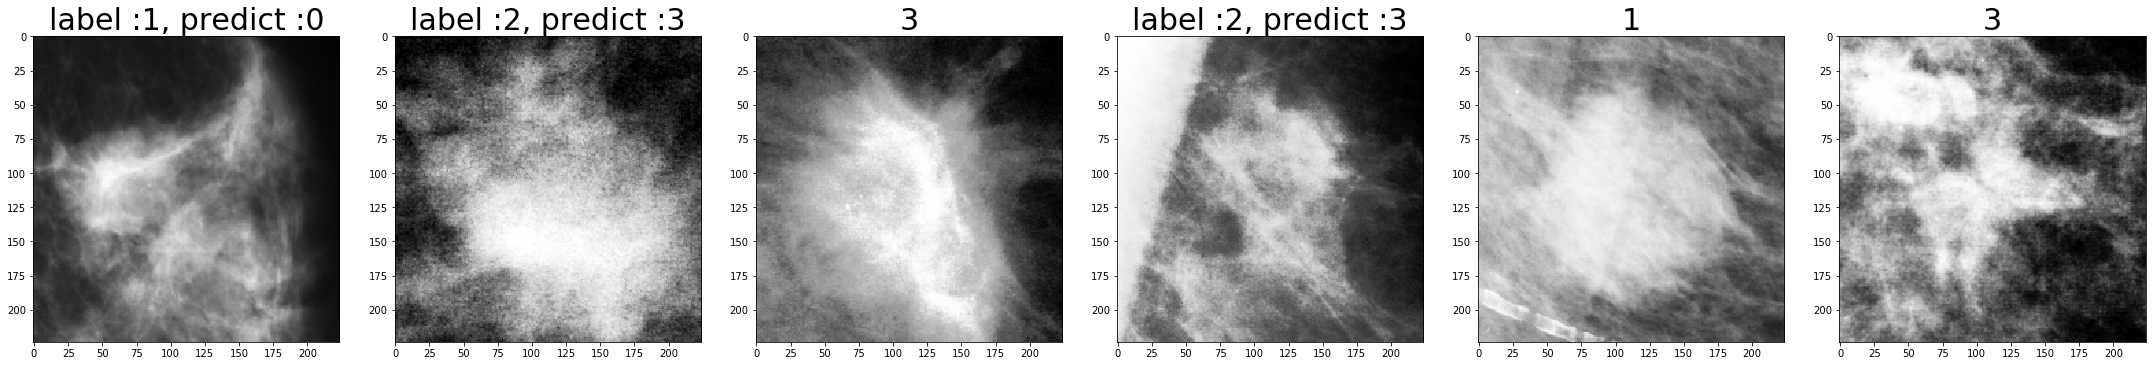

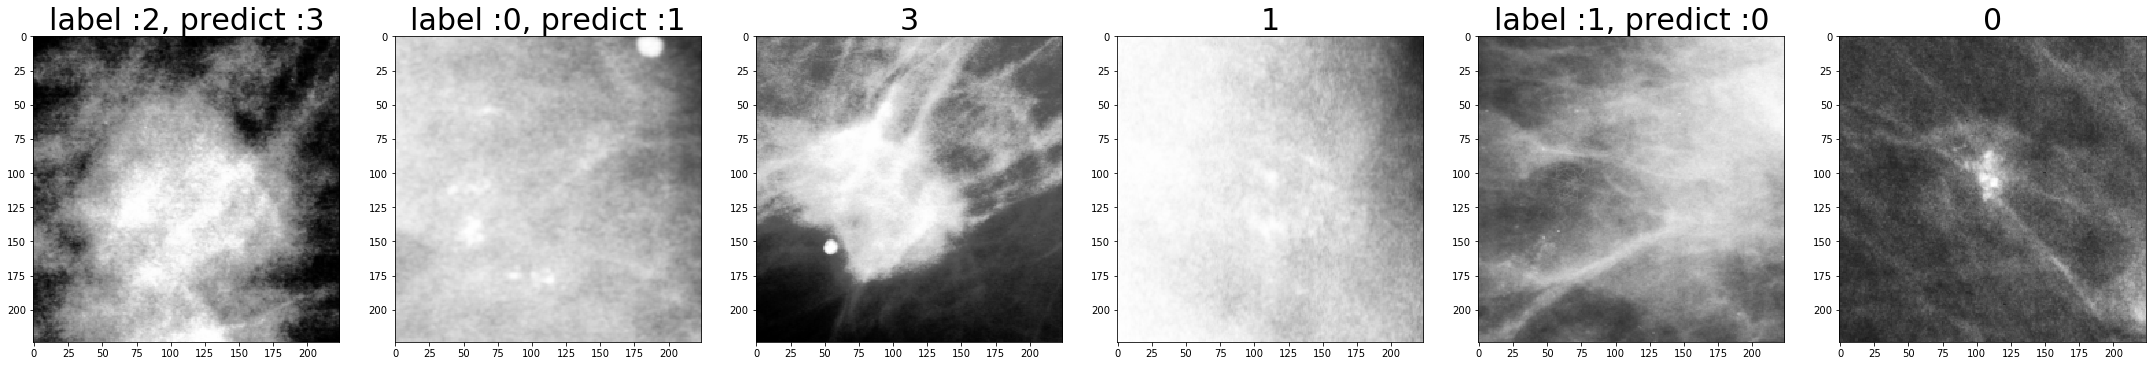

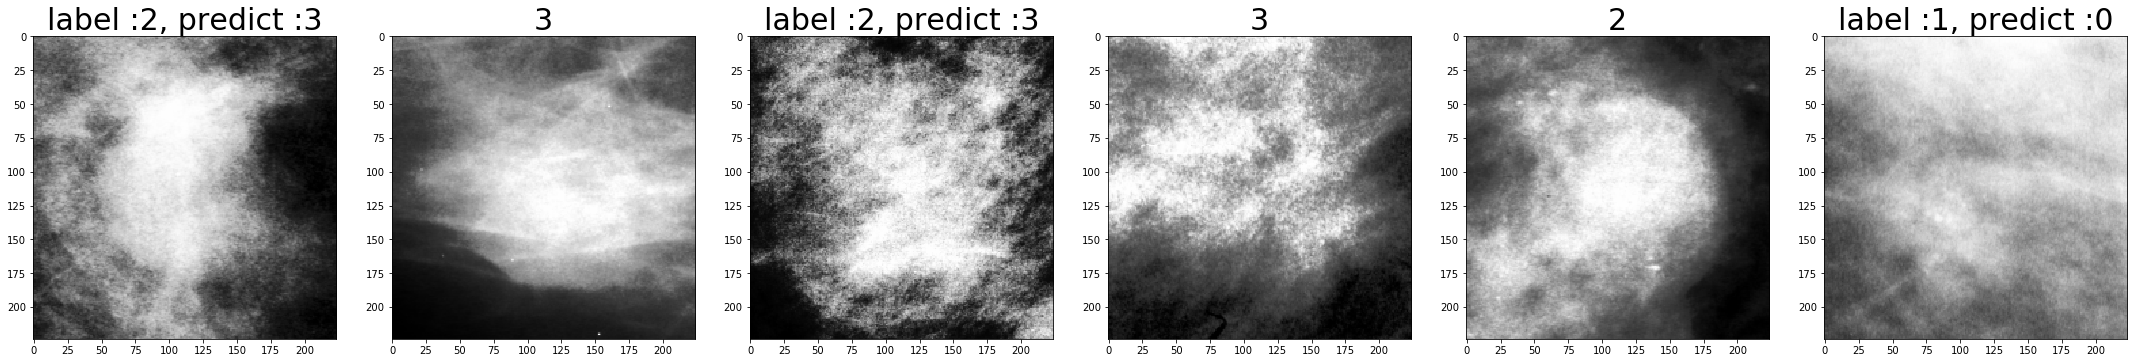

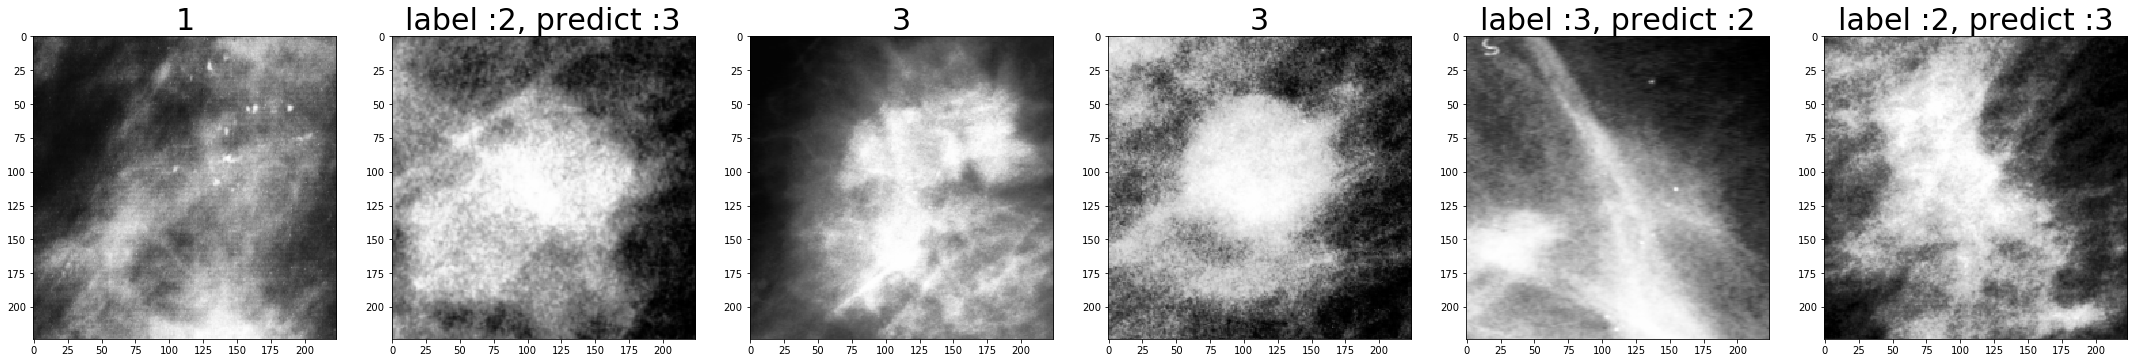

In [12]:
for i in range(0, 30, 6): 
    plot_data(X[i:], y_val_origin[i:], predict[i:], 6)